In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d hemendrasr/pizza-vs-ice-cream

Dataset URL: https://www.kaggle.com/datasets/hemendrasr/pizza-vs-ice-cream
License(s): other
 77% 32.0M/41.7M [00:00<00:00, 59.1MB/s]
100% 41.7M/41.7M [00:00<00:00, 80.5MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/pizza-vs-ice-cream.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD

In [ ]:
train_data = keras.utils.image_dataset_from_directory(
    directory='/content/dataset/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

valid_data = keras.utils.image_dataset_from_directory(
    directory='/content/dataset/valid',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

Found 718 files belonging to 2 classes.
Found 208 files belonging to 2 classes.


In [ ]:
def process(image, label):
  tf.cast(image/255., tf.float32)
  return(image, label)

train_data = train_data.map(process)
valid_data = valid_data.map(process)

In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(256,256,3)),
    BatchNormalization(),
    Dropout(0.1),
    MaxPooling2D(pool_size=(2,2), strides=2),

    Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.1),
    MaxPooling2D(pool_size=(2,2), strides=2),

    Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.1),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256, 256, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256, 256, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       8,388,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,446,337 (32.22 MB)

 Trainable params: 8,445,761 (32.22 MB)

 Non-trainable params: 576 (2.25 KB)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_data, epochs=10, validation_data=valid_data)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 210s 9s/step - accuracy: 0.8871 - loss: 0.2838 - val_accuracy: 0.5144 - val_loss: 2.6268
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 249s 8s/step - accuracy: 0.9326 - loss: 0.1785 - val_accuracy: 0.6875 - val_loss: 1.0612
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 203s 8s/step - accuracy: 0.9775 - loss: 0.0787 - val_accuracy: 0.7981 - val_loss: 0.5450
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 207s 9s/step - accuracy: 0.9963 - loss: 0.0398 - val_accuracy: 0.9375 - val_loss: 0.1919
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 195s 8s/step - accuracy: 0.9924 - loss: 0.0300 - val_accuracy: 0.9183 - val_loss: 0.2865
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 202s 8s/step - accuracy: 0.9896 - loss: 0.0435 - val_accuracy: 0.8990 - val_loss: 0.2989
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 210s 9s/step - accuracy: 0.9919 - loss: 0.0230 - val_accuracy: 0.9183 - val_loss: 0.2256
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 204s 9s/step - accuracy: 0.9945 - loss: 0.0152 - val_accuracy: 0.9375 - v

In [ ]:
model2 = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(256,256,3)),
    BatchNormalization(),
    Dropout(0.1),
    MaxPooling2D(pool_size=(2,2), strides=2),

    Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.1),
    MaxPooling2D(pool_size=(2,2), strides=2),

    Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.1),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256, 256, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256, 256, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       8,388,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,446,337 (32.22 MB)

 Trainable params: 8,445,761 (32.22 MB)

 Non-trainable params: 576 (2.25 KB)

In [ ]:
model2.compile(optimizer=Adam(learning_rate=0.01, beta_1=0.5, beta_2=0.5), loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(train_data, epochs=10, validation_data=valid_data)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 16s 354ms/step - accuracy: 0.7032 - loss: 0.7668 - val_accuracy: 0.4663 - val_loss: 84.3116
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.8449 - loss: 0.3488 - val_accuracy: 0.5337 - val_loss: 18.2285
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.9195 - loss: 0.2027 - val_accuracy: 0.7837 - val_loss: 3.8404
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.9433 - loss: 0.1766 - val_accuracy: 0.6442 - val_loss: 14.6502
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.9444 - loss: 0.1414 - val_accuracy: 0.8510 - val_loss: 1.6009
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.9712 - loss: 0.0616 - val_accuracy: 0.8558 - val_loss: 1.1514
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.9698 - loss: 0.1039 - val_accuracy: 0.8750 - val_loss: 0.6098
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.9920 - loss: 0.0297 - val_accuracy: 0.7

In [ ]:
model3 = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(256,256,3)),
    BatchNormalization(),
    Dropout(0.1),
    MaxPooling2D(pool_size=(2,2), strides=2),

    Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.1),
    MaxPooling2D(pool_size=(2,2), strides=2),

    Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.1),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 256, 256, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 256, 256, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 128, 128, 128)       │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 128, 128, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      16,777,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,964,609 (64.71 MB)

 Trainable params: 16,963,777 (64.71 MB)

 Non-trainable params: 832 (3.25 KB)

In [ ]:
model3.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
model3.fit(train_data, epochs=10, validation_data=valid_data)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 30s 709ms/step - accuracy: 0.7081 - loss: 0.8297 - val_accuracy: 0.4567 - val_loss: 31.7818
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.8494 - loss: 0.3644 - val_accuracy: 0.5673 - val_loss: 7.2774
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.8382 - loss: 0.3732 - val_accuracy: 0.5577 - val_loss: 5.0306
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 0.8947 - loss: 0.2392 - val_accuracy: 0.9087 - val_loss: 0.2580
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.9101 - loss: 0.2155 - val_accuracy: 0.5385 - val_loss: 2.6218
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step - accuracy: 0.9302 - loss: 0.1990 - val_accuracy: 0.5481 - val_loss: 3.6259
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.9586 - loss: 0.1200 - val_accuracy: 0.5481 - val_loss: 7.0228
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.9758 - loss: 0.0847 - val_accuracy: 

In [ ]:
model4 = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(256,256,3)),
    BatchNormalization(),
    Dropout(0.1),
    MaxPooling2D(pool_size=(2,2), strides=2),

    Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.1),
    MaxPooling2D(pool_size=(2,2), strides=2),

    Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.1),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model4.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
model4.fit(train_data, epochs=10, validation_data=valid_data)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 314ms/step - accuracy: 0.7465 - loss: 0.5611 - val_accuracy: 0.6923 - val_loss: 0.8494
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 104ms/step - accuracy: 0.9310 - loss: 0.1731 - val_accuracy: 0.7596 - val_loss: 0.6869
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.9548 - loss: 0.1103 - val_accuracy: 0.5192 - val_loss: 1.2589
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.9780 - loss: 0.0826 - val_accuracy: 0.8702 - val_loss: 0.3042
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.9904 - loss: 0.0518 - val_accuracy: 0.4856 - val_loss: 3.4122
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.9910 - loss: 0.0569 - val_accuracy: 0.8462 - val_loss: 0.3692
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.9890 - loss: 0.0434 - val_accuracy: 0.9135 - val_loss: 0.2547
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.9995 - loss: 0.0308 - val_accuracy: 0.610

In [ ]:
model5 = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(256,256,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=2),

    Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=2),

    Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.1),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model5.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
model5.fit(train_data, epochs=10, validation_data=valid_data)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 13s 324ms/step - accuracy: 0.6693 - loss: 3.1706 - val_accuracy: 0.4760 - val_loss: 0.9971
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 102ms/step - accuracy: 0.8648 - loss: 0.2901 - val_accuracy: 0.4952 - val_loss: 0.6343
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.9277 - loss: 0.1852 - val_accuracy: 0.5481 - val_loss: 0.6803
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.9488 - loss: 0.1351 - val_accuracy: 0.6010 - val_loss: 0.6584
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9773 - loss: 0.0938 - val_accuracy: 0.7788 - val_loss: 0.4339
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.9717 - loss: 0.0929 - val_accuracy: 0.8798 - val_loss: 0.3618
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9919 - loss: 0.0484 - val_accuracy: 0.8798 - val_loss: 0.3575
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.9791 - loss: 0.0482 - val_accuracy: 0.8894

In [ ]:
model6 = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(256,256,3)),
    Dropout(0.1),
    MaxPooling2D(pool_size=(2,2), strides=2),

    Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    Dropout(0.1),
    MaxPooling2D(pool_size=(2,2), strides=2),

    Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'),
    Dropout(0.1),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model6.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
model6.fit(train_data, epochs=10, validation_data=valid_data)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 253ms/step - accuracy: 0.5359 - loss: nan - val_accuracy: 0.5481 - val_loss: nan
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.5433 - loss: nan - val_accuracy: 0.5481 - val_loss: nan
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.5649 - loss: nan - val_accuracy: 0.5481 - val_loss: nan
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.5572 - loss: nan - val_accuracy: 0.5481 - val_loss: nan
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.5787 - loss: nan - val_accuracy: 0.5481 - val_loss: nan
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.5359 - loss: nan - val_accuracy: 0.5481 - val_loss: nan
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - accuracy: 0.5586 - loss: nan - val_accuracy: 0.5481 - val_loss: nan
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.5562 - loss: nan - val_accuracy: 0.5481 - val_loss: nan
Epoch 9/10
23/23 ━━━━━━━━━━━━

In [ ]:
model6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model6.fit(train_data, epochs=30, validation_data=valid_data)

Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 286ms/step - accuracy: 0.5719 - loss: nan - val_accuracy: 0.5481 - val_loss: nan
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.5555 - loss: nan - val_accuracy: 0.5481 - val_loss: nan
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.5572 - loss: nan - val_accuracy: 0.5481 - val_loss: nan
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.5351 - loss: nan - val_accuracy: 0.5481 - val_loss: nan
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.5359 - loss: nan - val_accuracy: 0.5481 - val_loss: nan
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.5618 - loss: nan - val_accuracy: 0.5481 - val_loss: nan
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.5520 - loss: nan - val_accuracy: 0.5481 - val_loss: nan
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.5474 - loss: nan - val_accuracy: 0.5481 - val_loss: nan
Epoch 9/30
23/23 ━━━━━━━━━━━━

In [ ]:
model7 = Sequential([
    Conv2D(32, kernel_size=(5,5), activation='relu', padding='same', input_shape=(256,256,3)),
    BatchNormalization(),
    Dropout(0.1),
    MaxPooling2D(pool_size=(2,2), strides=2),

    Conv2D(64, kernel_size=(5,5), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.1),
    MaxPooling2D(pool_size=(2,2), strides=2),

    Conv2D(64, kernel_size=(5,5), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.1),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model7.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model7.fit(train_data, epochs=10, validation_data=valid_data)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 28s 646ms/step - accuracy: 0.6908 - loss: 0.8890 - val_accuracy: 0.4615 - val_loss: 17.5335
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.9003 - loss: 0.2479 - val_accuracy: 0.4567 - val_loss: 21.7605
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.9392 - loss: 0.1508 - val_accuracy: 0.5529 - val_loss: 2.5041
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.9469 - loss: 0.1430 - val_accuracy: 0.7452 - val_loss: 1.1715
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.9649 - loss: 0.0933 - val_accuracy: 0.9231 - val_loss: 0.3360
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.9669 - loss: 0.0854 - val_accuracy: 0.6731 - val_loss: 1.5018
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.9788 - loss: 0.0677 - val_accuracy: 0.5721 - val_loss: 3.1718
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.9872 - loss: 0.0427 - val_accuracy:

In [ ]:
import joblib
# joblib.dump(model, 'PizzavsIceCream')

In [ ]:
model = joblib.load('PizzavsIceCream')

FileNotFoundError: [Errno 2] No such file or directory: 'PizzavsIceCream'

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/icecream.jpg')

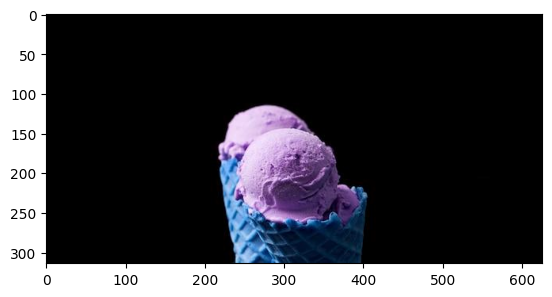

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(test_img)

In [ ]:
test_img.shape

(314, 626, 3)

In [ ]:
test_img = cv2.resize(test_img, (256,256))

In [ ]:
test_input_img = test_img.reshape(1,256,256,3)

In [ ]:
prediction = model.predict(test_input_img)
print(np.round(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.]]
